# **Cutomer reviews project**

## Merging datasets and basic cleaning

#### 0. Import libraries

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers 
ElectraTokenizer, ElectraForSequenceClassification, Trainer, TrainingArguments
import torch
from datasets import Dataset
import random
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount google drive
drive.mount('/content/drive')

All the datasets can be found in the following google drive folder:

https://drive.google.com/drive/folders/1oVaRhOykQpQlN0-MB4ga8Y-mGlsOKNEs?usp=sharing

#### 1. Merge and load the 3 different datasets and clean duplicates

We load the 3 datasets using concat and remove the dpulicates and have a first view at the dataset

In [2]:
# Load the datasets
# Read the three datasets into pandas DataFrames
data1 = pd.read_csv('/content/drive/MyDrive/Consumer_reviews_project/Project/datasets/1429_1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Consumer_reviews_project/Project/datasets/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Consumer_reviews_project/Project/datasets/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')


# Merge the datasets using pandas concat
consumer_reviews = pd.concat([data1, data2, data3], ignore_index=True)

# Optionally, clean the dataset by removing duplicates
consumer_reviews.drop_duplicates(inplace=True)

# Display the shape of the merged dataset
print(consumer_reviews.shape)

# Display the structure of the DataFrame
print(consumer_reviews.info())

# Display the structure of the DataFrame
print(consumer_reviews.columns)

# Display the first few rows of the merged dataset
consumer_reviews.head()

<ipython-input-2-5f9c9304d2b1>:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/content/drive/MyDrive/Consumer_reviews_project/Project/datasets/1429_1.csv')


(67897, 27)
<class 'pandas.core.frame.DataFrame'>
Index: 67897 entries, 0 to 67991
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67897 non-null  object 
 1   name                  61137 non-null  object 
 2   asins                 67895 non-null  object 
 3   brand                 67897 non-null  object 
 4   categories            67897 non-null  object 
 5   keys                  67897 non-null  object 
 6   manufacturer          67897 non-null  object 
 7   reviews.date          67858 non-null  object 
 8   reviews.dateAdded     25083 non-null  object 
 9   reviews.dateSeen      67897 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55057 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55151 non-null  float64
 14  reviews.rating        67864 non-null  float64
 15  reviews.sour

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,NaN,NaN,NaN,NaN,NaN,NaN
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Good!!!,NaN,NaN,Shacks,NaN,NaN,NaN,NaN,NaN,NaN
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Fantastic Tablet for kids,NaN,NaN,explore42,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Drop unwanted columns
We won´t be needing all the columns in order to make the sentiment analysis or the category classification. We choose the relevant columns for the project:

In [3]:
# Select relevant columns for sentiment analysis and category classification
relevant_columns = ['name', 'reviews.text', 'reviews.title', 'reviews.rating', 'categories','reviews.doRecommend']
consumer_reviews = consumer_reviews[relevant_columns]

# Display the first few rows of the updated dataframe
consumer_reviews.head()

,name,reviews.text,reviews.title,reviews.rating,categories,reviews.doRecommend
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,Kindle,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,very fast,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True


#### 3. Clean empty rows
We will see if there are any empty rows in the dataset and depending on the result we will drop them or not.

In [4]:
# View number of NaN values for each column
nan_counts = consumer_reviews.isnull().sum()
print(nan_counts)

name                    6760
reviews.text               1
reviews.title             19
reviews.rating            33
categories                 0
reviews.doRecommend    12840
dtype: int64


As the name column with Naan is almost a 10% of the dataset and will be only relevant for the predictions on the category classification model, we will create a dataset for sentiment analysis called sentiment and drop tthe rest of the rows with Naan values.

In [5]:
relevant_columns_for_sentiment = [ 'reviews.text', 'reviews.title', 'reviews.rating']
sentiment_df = consumer_reviews[relevant_columns_for_sentiment]

In [6]:
# As Naan values for the rest of the columns are not significant, we can drop them
sentiment_df = sentiment_df.dropna()
# Chack the shape of the dataset with no Naan
print(sentiment_df.shape)

(67844, 3)


# Create a sentiment Analysis model

We use the sentiment Analysis model to determine the sentiment of the review

### 1. Create a new column 'label' for sentiment analysis

In [7]:
# Create a new column 'label' based on the 'reviews.rating' column
sentiment_df['label'] = sentiment_df['reviews.rating'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

# Show the dataset with the new column
sentiment_df.head()

,reviews.text,reviews.title,reviews.rating,label
0,This product so far has not disappointed. My c...,Kindle,5.0,positive
1,great for beginner or experienced person. Boug...,very fast,5.0,positive
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,positive
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,positive
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,positive


### 2. Preprocess the Data

We´ll use a transformers library to handle tokenization. Preprocessing steps:

•	Convert the labels into numerical format.

•	Tokenize the text using a tokenizer compatible with the transformer model.

In [8]:
# Convert labels to numerical format (assuming positive = 2, neutral = 1, negative = 0)
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
sentiment_df['label'] = sentiment_df['label'].map(label_mapping)

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    sentiment_df['reviews.text'].tolist(), sentiment_df['label'].tolist(), test_size=0.2, random_state=42)

# Load the tokenizer
tokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')

# Tokenize the texts (adjust max lenght for longer reviews)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### 3. Create a Dataset Class

Hugging Face transformers work well with PyTorch Dataset. We need to create a custom dataset class that returns the input tensors (tokenized data) and labels.

In [9]:
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets for training and validation
train_dataset = ReviewsDataset(train_encodings, train_labels)
val_dataset = ReviewsDataset(val_encodings, val_labels)

### 4. Set up the Transformer Model

We’ll use BertForSequenceClassification from Hugging Face, which is designed for classification tasks. We’ll fine-tune it for our dataset.

In [10]:
# Load the pre-trained BERT / electra model for sequence classification
model = ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator', num_labels=3)

# Make sure all model parameters are contiguous
for name, param in model.named_parameters():
    if not param.is_contiguous():
        param.data = param.data.contiguous()

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 5. Train and evaluate the model

Now, we’ll use Hugging Face’s Trainer API to train the model. It simplifies the process of training by handling the optimization steps, evaluation, etc.

In [11]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory for saving model checkpoints
    num_train_epochs=3,              # number of training epochs (only "fine tunned" parameter)
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",     # evaluate after each epoch
)

# Initialize the Trainer
trainer = Trainer (
    model = model,                         # the pre-trained model
    args = training_args,                  # training arguments
    train_dataset = train_dataset,         # training dataset
    eval_dataset = val_dataset,             # evaluation dataset
)


# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.176000,0.181923,0.941189,0.932829,0.941189,0.935916
2,0.050200,0.168540,0.952097,0.945840,0.952097,0.948085
3,0.154600,0.177212,0.954750,0.950988,0.954750,0.952535


{'eval_loss': 0.17721229791641235,
 'eval_accuracy': 0.9547497973321541,
 'eval_precision': 0.9509883041943736,
 'eval_recall': 0.9547497973321541,
 'eval_f1': 0.9525354725351926,
 'eval_runtime': 11.0945,
 'eval_samples_per_second': 1223.034,
 'eval_steps_per_second': 76.524,
 'epoch': 3.0}

### 6. Inference with the model

For further evaluation an to see if teh model really works we will create some samples for the model to see if it categorizes sentiment adecualtely.

In [12]:
# Example reviews for inference
new_reviews = [
    "This product is amazing! I love it.",
    "I'm not sure about this product. It's okay, but not great.",
    "This is the worst product ever. Do not buy it.",
    "Not a bad product but not great either",
    "Im in love with this tablet.",
    "Just an ok product, not good but not bad.",
    "I think this is not a good product at all.",
    "I´m going to ask for a refund, I´m not satisfied."
]

# Load the tokenizer with pretrained model
tokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')

# Tokenize the new reviews
new_review_encodings = tokenizer(new_reviews, truncation=True, padding=True, max_length=512)

class InferenceDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings.input_ids)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

# Create the inference dataset
inference_dataset = InferenceDataset(new_review_encodings)

# Make predictions
predictions = trainer.predict(inference_dataset)

# Get predicted labels
predicted_labels = predictions.predictions.argmax(-1)

# Map the numerical predictions to sentiment labels
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_sentiments = [label_mapping[label] for label in predicted_labels]

# Print the predicted sentiments
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Review: This product is amazing! I love it.
Predicted Sentiment: positive


Review: I'm not sure about this product. It's okay, but not great.
Predicted Sentiment: neutral


Review: This is the worst product ever. Do not buy it.
Predicted Sentiment: negative


Review: Not a bad product but not great either
Predicted Sentiment: neutral


Review: Im in love with this tablet.
Predicted Sentiment: positive


Review: Just an ok product, not good but not bad.
Predicted Sentiment: neutral


Review: I think this is not a good product at all.
Predicted Sentiment: negative


Review: I´m going to ask for a refund, I´m not satisfied.
Predicted Sentiment: negative




In [13]:
# Save the fine-tuned model
model.save_pretrained('./sentiment-model')
tokenizer.save_pretrained('./sentiment-model')

('./sentiment-model/tokenizer_config.json',
 './sentiment-model/special_tokens_map.json',
 './sentiment-model/vocab.txt',
 './sentiment-model/added_tokens.json')

### 8. Save the model in case it is needed afterwards

In [14]:
# Number of random samples to take
num_samples = 10

# Get random samples from the 'reviews.text' column, filtering out non-string values
random_reviews = random.sample(
    [review for review in sentiment_df['reviews.text'].tolist() if isinstance(review, str)],
    num_samples
)

# Extract logits (predictions.predictions) and apply softmax
logits = predictions.predictions
probabilities = softmax(logits, axis=1)

# Get predicted labels
predicted_labels = logits.argmax(-1)

# Map the numerical predictions to sentiment labels

# Print the predicted sentiments and scores for the random reviews
for review, sentiment_idx, probs in zip(random_reviews, predicted_labels, probabilities):
    # Convert probabilities to a dictionary with sentiment labels
    sentiment_scores = {label_mapping[i]: round(float(prob), 4) for i, prob in enumerate(probs)}

    # Map the predicted index to the sentiment label
    predicted_sentiment = label_mapping[sentiment_idx]

    # Print the review, the predicted sentiment, and the scores
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print(f"Scores: {sentiment_scores}")
    print("\n")

Review: Perfect size for travel. Holds a lot of books, easy to download to.
Predicted Sentiment: positive
Scores: {'negative': 0.0002, 'neutral': 0.0015, 'positive': 0.9983}


Review: Does the job and does it well.
Predicted Sentiment: neutral
Scores: {'negative': 0.0893, 'neutral': 0.8579, 'positive': 0.0527}


Review: Love this thing ! I have linked it to my Hue System and my Fire TV. I ask her and she does it. Fun to play games also. My wife was sceptical but now she uses it more than me
Predicted Sentiment: negative
Scores: {'negative': 0.9715, 'neutral': 0.0234, 'positive': 0.0051}


Review: The Fire TV box works great. We were looking for a device that streams DirecTV Now and this device was significantly less than a competing device that offered the service. We liked the first one so much we bought a second one.
Predicted Sentiment: neutral
Scores: {'negative': 0.0805, 'neutral': 0.6888, 'positive': 0.2307}


Review: Pretty cool kids love it. Always adding things to my grocery l

In [15]:
# Save the fine-tuned model
model.save_pretrained('./sentiment-model')
tokenizer.save_pretrained('./sentiment-model')

('./sentiment-model/tokenizer_config.json',
 './sentiment-model/special_tokens_map.json',
 './sentiment-model/vocab.txt',
 './sentiment-model/added_tokens.json')

# Create a category classifier




In [16]:
# First we will save the consumer reviews df in case it is detroyed
base_consumer_reviews = consumer_reviews.copy()
base_consumer_reviews.head()

,name,reviews.text,reviews.title,reviews.rating,categories,reviews.doRecommend
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,Kindle,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,very fast,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True


 ## 1. Prepare the dataset for the classification model

Data preprocessing

In [17]:
relevant_columns = ['name', 'categories','reviews.text', 'reviews.title', 'reviews.rating']
consumer_reviews = consumer_reviews[relevant_columns]
consumer_reviews.head()

,name,categories,reviews.text,reviews.title,reviews.rating
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",This product so far has not disappointed. My c...,Kindle,5.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",great for beginner or experienced person. Boug...,very fast,5.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0


Check the unique words found in the 'categories' column to do a mapping.

In [18]:
# Assuming df is your DataFrame and 'reviews.text' is the column you want to convert
consumer_reviews['categories'] = consumer_reviews['categories'].str.lower()
consumer_reviews['name'] = consumer_reviews['name'].str.lower()

# Display the updated DataFrame
# Use a list of column names to select multiple columns
consumer_reviews[['categories', 'name']].head()

,categories,name
0,"electronics,ipad & tablets,all tablets,fire ta...","all-new fire hd 8 tablet, 8 hd display, wi-fi,..."
1,"electronics,ipad & tablets,all tablets,fire ta...","all-new fire hd 8 tablet, 8 hd display, wi-fi,..."
2,"electronics,ipad & tablets,all tablets,fire ta...","all-new fire hd 8 tablet, 8 hd display, wi-fi,..."
3,"electronics,ipad & tablets,all tablets,fire ta...","all-new fire hd 8 tablet, 8 hd display, wi-fi,..."
4,"electronics,ipad & tablets,all tablets,fire ta...","all-new fire hd 8 tablet, 8 hd display, wi-fi,..."


In [19]:
# Define a function to extract unique categories
def extract_unique_categories(df: pd.DataFrame) -> list:
    """
    Extract unique categories from a DataFrame and count the occurrences of each category.

    Args:
        df (pd.DataFrame): The input DataFrame containing a 'categories' column.

    Returns:
        dict: A dictionary where the keys are the unique categories and the values are the counts.
    """
    if 'categories' not in df.columns:
        raise ValueError("The 'categories' column is not found in the DataFrame.")

    category_counts = {}
    for _, row in df.iterrows():
        if isinstance(row['categories'], str):
            categories = row['categories'].split(',')  # Assuming comma as the delimiter
            for category in categories:
                category = category.strip()
                if category in category_counts:
                    category_counts[category] += 1
                else:
                    category_counts[category] = 1

    return category_counts

['kitchen & dining', 'household & baby care', 'camera & photo', 'voice assistants', 'on to college', 'amazon ereaders', 'kids & family', 'crates & kennels', 'why keep them waiting prime free two-day shipping', 'tablet cases covers', 'expanding wallets', 'computer speakers', 'pet products', 'coffee pod holders', 'cables & chargers', 'stands & shelves', 'amazon echo accessories', 'file folders & accessories', 'smart hubs', 'tablet & e-reader accessories', 'streaming devices', 'cable or adapter', 'expanding file jackets & pockets', 'tvs entertainment', 'laptop computer stands', 'keyboards', 'smart hubs & wireless routers', 'cages & crates', 'carriers & totes', 'surveillance', 'hubs & accessories', 'all tablets', 'home theater & audio', 'ebook readers', 'virtual assistant speakers', 'office products', 'speaker cables', 'electrical', 'home & furniture clearance', 'expanding file jackets pockets', 'abis electronics', 'ebook readers & accessories', 'kitchen dining features', 'dvd cases', 'cam

### 2.Create a Mapping Function

Use a mapping function to assign each old category into one of the new categories based on the content of the “categories” column.

In [20]:
# Define a function for category mapping
def map_new_category(old_category):
    old_category = old_category.lower()
    if any(keyword in old_category for keyword in ['aaa', 'aa', 'battery', 'charger', 'power adapter']):
        return 'Batteries and Chargers'
    elif any(keyword in old_category for keyword in ['e-reader', 'kindle']):
        return 'E-readers'
    elif any(keyword in old_category for keyword in ['tablet']):
        return 'Tablets'
    elif any(keyword in old_category for keyword in ['smart', 'alexa', 'echo', 'home automation', 'voice assistant']):
        return 'Smart Devices'
    else:
        return 'Others'

### 3: Add the Mapping to the Dataset

Now, apply the mapping function to the categories column and create the 'new_categories' column.

In [21]:
# Apply the mapping to the dataset
consumer_reviews['new_categories'] = consumer_reviews['categories'].apply(map_new_category)

# Check the result
consumer_reviews[['categories', 'new_categories']].head()

,categories,new_categories
0,"electronics,ipad & tablets,all tablets,fire ta...",Tablets
1,"electronics,ipad & tablets,all tablets,fire ta...",Tablets
2,"electronics,ipad & tablets,all tablets,fire ta...",Tablets
3,"electronics,ipad & tablets,all tablets,fire ta...",Tablets
4,"electronics,ipad & tablets,all tablets,fire ta...",Tablets


In [22]:
# Group the DataFrame by 'new_categories'
grouped = consumer_reviews.groupby('new_categories')

# Initialize an empty list to store the examples
category_examples = []

# Iterate through each group
for category, group in grouped:
    # Randomly select 3 rows from the group
    # Using .sample(n=3, replace=False) for random selection without replacement
    # If a group has fewer than 3 rows, it will select all rows
    random_samples = group.sample(n=3, replace=False) if len(group) >= 3 else group

    # Append the selected rows to the list
    category_examples.append(random_samples)

# Concatenate the list of DataFrames into a single DataFrame
category_examples = pd.concat(category_examples)

# Print the examples
for category, group in category_examples.groupby('new_categories'):
    print(f"Category: {category}")
    for index, row in group.iterrows():
        # Check if 'name' contains any keyword from the 'new_categories'
        # Convert row['name'] to string before calling lower() to handle potential float values
        name = str(row['name'])
        if any(keyword in name.lower() for keyword in category.lower().split()):
            print(f"  - {row['name']}")
    print("-" * 20)

Category: Batteries and Chargers
  - amazonbasics aaa performance alkaline batteries (36 count): Matches Category
  - amazonbasics aa performance alkaline batteries (48 count) - packaging may vary: Matches Category
  - amazonbasics aaa performance alkaline batteries (36 count): Matches Category
--------------------
Category: E-readers
  - nan: Does Not Match Category
  - amazon kindle paperwhite - ebook reader - 4 gb - 6 monochrome paperwhite - touchscreen - wi-fi - black,,,: Does Not Match Category
  - kindle oasis e-reader with leather charging cover - walnut, 6 high-resolution display (300 ppi), wi-fi - includes special offers: Does Not Match Category
--------------------
Category: Others
  - fire tablet, 7 display, wi-fi, 8 gb - includes special offers, black: Does Not Match Category
  - fire tablet, 7 display, wi-fi, 8 gb - includes special offers, black: Does Not Match Category
  - certified refurbished amazon fire tv with alexa voice remote: Does Not Match Category
-------------

In [23]:
# Evaluate the distribution of new categories
category_distribution = consumer_reviews['new_categories'].value_counts()
print(category_distribution)

new_categories
Tablets                   34002
E-readers                 19627
Batteries and Chargers    12682
Smart Devices              1475
Others                      111
Name: count, dtype: int64


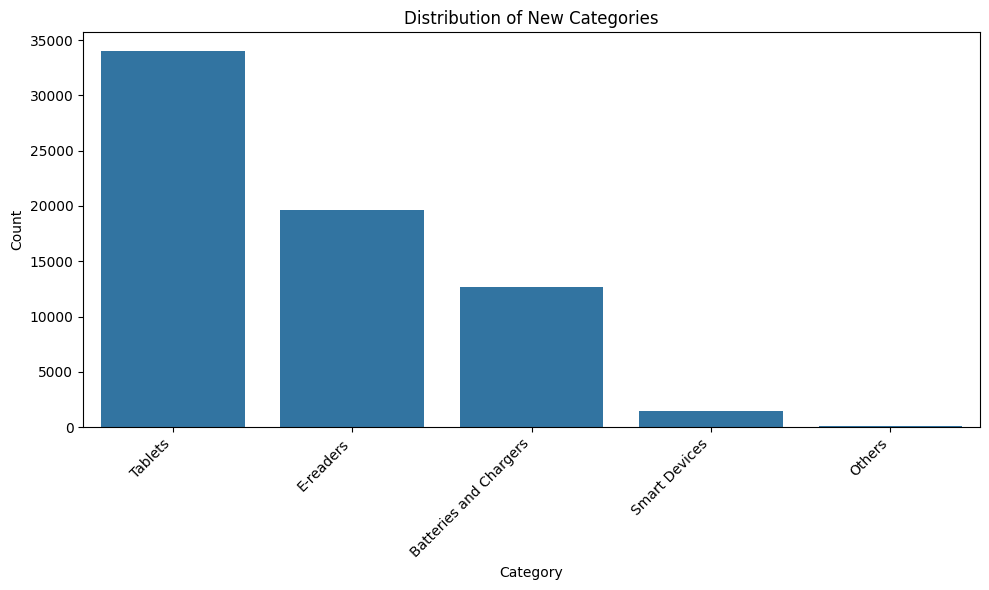

In [24]:
# Group the DataFrame by 'new_categories' and get the counts
category_counts = consumer_reviews['new_categories'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='new_categories', data=consumer_reviews, order=category_counts.index)
plt.title('Distribution of New Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 4: Tokenize the new column using LLMs and prpare for training

You can use a mapping function to assign each old category into one of the new categories based on the content of the “categories” column.

In [26]:
#!pip install datasets

# Apply the mapping to create new categories
consumer_reviews['new_categories'] = consumer_reviews['categories'].apply(map_new_category)

# Map categories to numeric labels for training
category_mapping = {category: idx for idx, category in enumerate(consumer_reviews['new_categories'].unique())}
consumer_reviews['label'] = consumer_reviews['new_categories'].map(category_mapping)

# Split the dataset into training and validation sets
train_df, test_df = train_test_split(consumer_reviews[['categories', 'label']], test_size=0.2)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00


In [27]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['categories'], truncation=True, padding='max_length')

# Apply the tokenizer to the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/54317 [00:00<?, ? examples/s]

Map:   0%|          | 0/13580 [00:00<?, ? examples/s]

### 4: Load and train the model

You can use a mapping function to assign each old category into one of the new categories based on the content of the “categories” column.

In [28]:
# Load the pre-trained model for classification
model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=5)

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# Check the unique labels in dataset and their range
unique_labels = consumer_reviews['label'].unique()
num_labels = len(unique_labels)

# Print unique labels and check if any are out of range
print(f"Unique labels: {unique_labels}")
print(f"Number of unique labels: {num_labels}")

Unique labels: [0 1 2 3 4]
Number of unique labels: 5


In [32]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
)
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.001500,0.000751,1.000000,1.000000,1.000000,1.000000
2,0.000400,0.000258,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=6790, training_loss=0.021612640439542297, metrics={'train_runtime': 592.518, 'train_samples_per_second': 183.343, 'train_steps_per_second': 11.46, 'total_flos': 3603320017852416.0, 'train_loss': 0.021612640439542297, 'epoch': 2.0})

Evaluate the model

In [33]:
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

Evaluation results: {'eval_loss': 0.00025790423387661576, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 27.7372, 'eval_samples_per_second': 489.595, 'eval_steps_per_second': 30.609, 'epoch': 2.0}


### 5: Save the pretrained model

Once the model is working we´ll save for furhter use

In [34]:
# Save the fine-tuned model
model.save_pretrained('./category-classifier-model')
tokenizer.save_pretrained('./category-classifier-model')

('./category-classifier-model/tokenizer_config.json',
 './category-classifier-model/special_tokens_map.json',
 './category-classifier-model/vocab.txt',
 './category-classifier-model/added_tokens.json',
 './category-classifier-model/tokenizer.json')

### 6: Evaluate the model

We will evaluate the model using plain evaluation to se the model loss and using inference to check that the model is calssifying correctly the products using the 'name' column.

In [35]:
# Number of random samples to take
num_samples = 10

# Get random samples from the 'name' column, filtering out non-string values
random_names = random.sample(
    [name for name in consumer_reviews['name'].tolist() if isinstance(name, str)],
    num_samples
)
for name in random_names:
    inputs = tokenizer(name, return_tensors="pt", truncation=True, padding='max_length')
    inputs = inputs.to(model.device)  # Move inputs to the same device as the model

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class = logits.argmax().item()

    # Define reverse_category_mapping inside the loop
    reverse_category_mapping = {v: k for k, v in category_mapping.items()}
    predicted_category = reverse_category_mapping[predicted_class]

    print(f"Product Name: {name}")
    print(f"Predicted category: {predicted_category}")
    print("-" * 10)
    print("-" * 10)

Product Name: amazonbasics aa performance alkaline batteries (48 count) - packaging may vary
Predicted category: Others
----------
----------
Product Name: fire tablet, 7 display, wi-fi, 8 gb - includes special offers, magenta
Predicted category: Tablets
----------
----------
Product Name: all-new fire hd 8 tablet, 8 hd display, wi-fi, 16 gb - includes special offers, magenta
Predicted category: Tablets
----------
----------
Product Name: all-new fire hd 8 tablet, 8 hd display, wi-fi, 16 gb - includes special offers, black
Predicted category: Tablets
----------
----------
Product Name: amazon kindle paperwhite - ebook reader - 4 gb - 6 monochrome paperwhite - touchscreen - wi-fi - black,,,
Predicted category: E-readers
----------
----------
Product Name: fire kids edition tablet, 7 display, wi-fi, 16 gb, green kid-proof case
Predicted category: Tablets
----------
----------
Product Name: brand new amazon kindle fire 16gb 7 ips display tablet wifi 16 gb blue,,,
Predicted category: E-rea